In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train_full.shape, y_test.shape

((60000,), (10000,))

In [6]:
X_train_full[0].shape

(28, 28)

In [7]:
import matplotlib.pyplot as plt

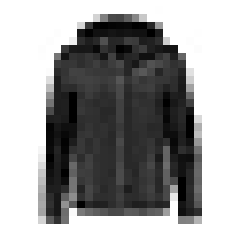

In [8]:
plt.imshow(X_train_full[5000], cmap = "binary")
plt.axis('off')
plt.show()

In [9]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

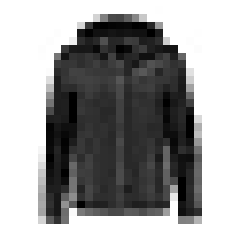

In [78]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [79]:
y_train_full[0]

9

In [64]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300),
    keras.layers.ReLU(),
    keras.layers.Dense(100),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [73]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235200    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30000     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

In [67]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [68]:
weights, biases = hidden1.get_weights()

In [69]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [70]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.8571 - accuracy: 0.7156 - val_loss: 0.5601 - val_accuracy: 0.8180
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5769 - accuracy: 0.8041 - val_loss: 0.4846 - val_accuracy: 0.8378
Epoch 3/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.5177 - accuracy: 0.8219 - val_loss: 0.4471 - val_accuracy: 0.8482
Epoch 4/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4841 - accuracy: 0.8324 - val_loss: 0.4238 - val_accuracy: 0.8580
Epoch 5/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4601 - accuracy: 0.8399 - val_loss: 0.4071 - val_accuracy: 0.8602
Epoch 6/10
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4402 - accuracy: 0.8471 - val_loss: 0.3947 - val_accuracy: 0.8644
Epoch 7/10
55000/55000 [===========================

In [71]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.7228 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.5304 - val_sparse_categorical_accuracy: 0.8160
Epoch 2/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4838 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.4494 - val_sparse_categorical_accuracy: 0.8454al_accu
Epoch 3/30
46400/55000 [========================>.....] - ETA: 0s - loss: 0.4438 - sparse_categorical_accuracy: 0.8448

KeyboardInterrupt: 

In [32]:
X_train.shape

(11610, 8)

In [34]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

ValueError: A target array with shape (55000, 1) was passed for an output of shape (None, 28, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [5]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [37]:
hidden1

<tf.Tensor 'dense/Identity:0' shape=(None, 30) dtype=float32>